## Create a Pipeline Model for "big_mart_sales"

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv("datasets/big_mart_sales.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Null Values Analysis..

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Ctegorical Columns Analysis...

In [5]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [9]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

## Drop Identifiers Columns...
#### As not required for sales Pediction

In [10]:
df.drop(["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [12]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### Value Mapping for categorical Encoding...

In [13]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

### Train Test Split...

In [67]:
X = df.drop("Item_Outlet_Sales", axis=1)
y = df['Item_Outlet_Sales']
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3347,NaN,Low Fat,0.054364,Fruits and Vegetables,105.0990,1985,Small,Tier 1,Grocery Store
548,17.85,Low Fat,0.018061,Health and Hygiene,97.0094,2002,NaN,Tier 2,Supermarket Type1
2880,14.00,Regular,0.037491,Frozen Foods,164.2526,1987,High,Tier 3,Supermarket Type1
3154,NaN,Low Fat,0.049066,Snack Foods,192.4478,1985,Medium,Tier 3,Supermarket Type3
6181,14.00,Regular,0.105145,Frozen Foods,144.2812,1997,Small,Tier 1,Supermarket Type1


In [68]:
y_Train.head()

3347     103.1990
548     2094.6068
2880    1808.9786
3154    8912.3988
6181    4844.3608
Name: Item_Outlet_Sales, dtype: float64

### EDA for missing values imputation...
#### Distribution before Imputation

<Axes: >

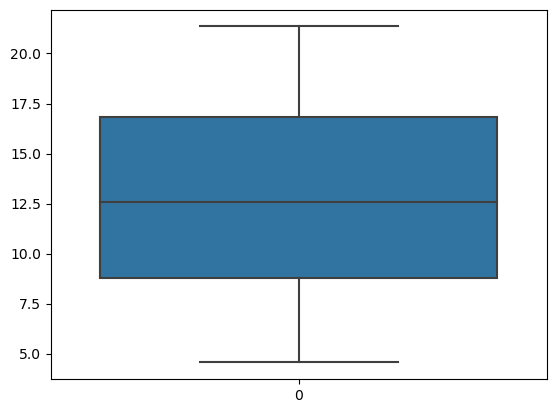

In [16]:
sns.boxplot(data=df.Item_Weight)

<Axes: xlabel='Item_Weight', ylabel='Count'>

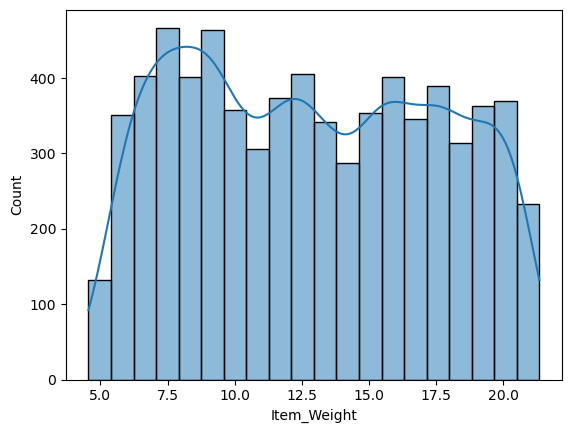

In [17]:
sns.histplot(x=df['Item_Weight'], kde=True)

<Axes: xlabel='Outlet_Size', ylabel='count'>

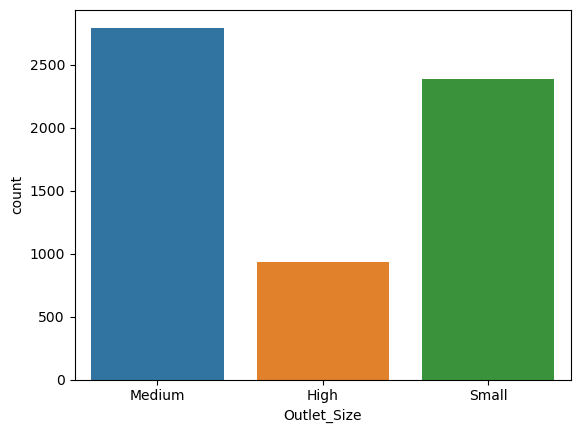

In [18]:
sns.countplot(x='Outlet_Size', data=df)

<Axes: xlabel='Outlet_Size', ylabel='Count'>

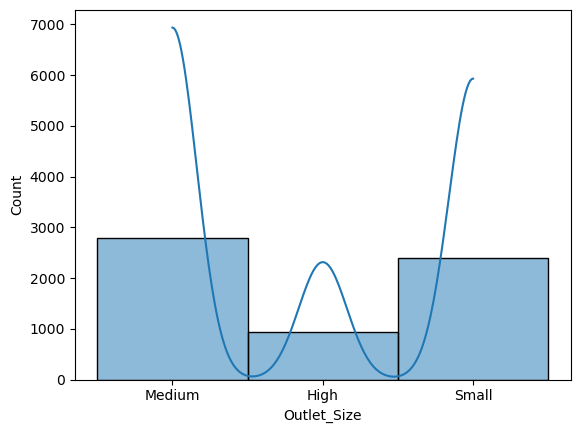

In [20]:
sns.histplot(x=df['Outlet_Size'], kde=True)

## Pipeline...
### Preprocessing.

In [69]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 3347 to 4766
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5649 non-null   float64
 1   Item_Fat_Content           6818 non-null   object 
 2   Item_Visibility            6818 non-null   float64
 3   Item_Type                  6818 non-null   object 
 4   Item_MRP                   6818 non-null   float64
 5   Outlet_Establishment_Year  6818 non-null   int64  
 6   Outlet_Size                4888 non-null   object 
 7   Outlet_Location_Type       6818 non-null   object 
 8   Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 532.7+ KB


In [70]:
print(X_Train.Item_Fat_Content.unique())
print(X_Train.Outlet_Size.unique())
print(X_Train.Outlet_Location_Type.unique())
print(X_Train.Item_Type.unique())
print(X_Train.Outlet_Type.unique())

['Low Fat' 'Regular']
['Small' nan 'High' 'Medium']
['Tier 1' 'Tier 2' 'Tier 3']
['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Snack Foods'
 'Baking Goods' 'Dairy' 'Starchy Foods' 'Household' 'Canned' 'Soft Drinks'
 'Meat' 'Others' 'Hard Drinks' 'Breads' 'Breakfast' 'Seafood']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type3'
 'Supermarket Type2']


In [71]:
categorical_impute_transformer = Pipeline(steps=
                                    [
                                        ('si', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('oe1', OrdinalEncoder(categories=[['Small', 'Medium','High']], dtype=np.int8))
                                    ]
                                   )
numeric_imputer = Pipeline(
                                    [
                                        ('si1', SimpleImputer(missing_values=np.nan, strategy='mean'))
                                    ]
                                   )
categorical_Nominal_transformer = Pipeline(steps=
                                    [
                                        ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore'))
                                    ]
                                   )
categorical_Ordinal_transformer = Pipeline(steps=
                                    [
                                        ('oe', OrdinalEncoder(categories=[['Low Fat', 'Regular'],['Tier 1', 'Tier 2', 'Tier 3']], dtype=np.int8))
                                    ]
                                   )

In [72]:
preprocessor = ColumnTransformer(transformers=
                                     [
                                         ('numeric', numeric_imputer, [0]),
                                         ('categoricalimputer', categorical_impute_transformer, [6]),
                                         ('categoricalNominal', categorical_Nominal_transformer, [3,8]),
                                         ('categoricalOrdinal', categorical_Ordinal_transformer, [1,7])
                                     ], remainder='passthrough'
                                 )

### Linear Regression...

In [73]:
model_pipe_Linear = Pipeline(steps=
                      [
                          ('preprocessor', preprocessor),
                          ('standard', StandardScaler()),
                          ('Estimator', LinearRegression())
                      ]
                     )
model_pipe_Linear

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('si1',
                                                                   SimpleImputer())]),
                                                  [0]),
                                                 ('categoricalimputer',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe1',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']],
                                                                                  dtype=<class 'numpy.int8'>))]),
                                                  [6]),
                                                 ('categoricalNominal',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [3, 8]),
                                                 ('categoricalOrdinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Fat',
                                                                                               'Regular'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']],
                                                                                  dtype=<class 'numpy.int8'>))]),
                                                  [1, 7])])),
                ('standard', StandardScaler()),
                ('Estimator', LinearRegression())])

In [74]:
model_pipe_Linear.fit(X_Train, y_Train)
model_pipe_Linear.score(X_Test, y_Test)

0.587038606967849

### Linear Model Score...

In [75]:
cross_val_score(model_pipe_Linear, X_Train, y_Train, cv=5, scoring='r2').mean()

0.5501293560180656

## Ridge Regression with GridSearchCV..

In [86]:
params = {"alpha":[1000, 100, 10, 1, 0.5, 0.2],
         "solver": ['lsqr','svd', 'cholesky', 'sag']}

model_pipe_Rigde = Pipeline(steps=
                      [
                          ('preprocessor', preprocessor),
                          ('standard', StandardScaler()),
                          ('Estimator', GridSearchCV(estimator=Ridge(), param_grid=params, cv=5, n_jobs=-1))
                      ]
                     )
model_pipe_Rigde

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('si1',
                                                                   SimpleImputer())]),
                                                  [0]),
                                                 ('categoricalimputer',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe1',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']],
                                                                                  dtype=<class 'numpy.int8'>))]),
                                                  [6]),
                                                 ('categoricalNominal',
                                                  P...
                                                  [3, 8]),
                                                 ('categoricalOrdinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Fat',
                                                                                               'Regular'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']],
                                                                                  dtype=<class 'numpy.int8'>))]),
                                                  [1, 7])])),
                ('standard', StandardScaler()),
                ('Estimator',
                 GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                              param_grid={'alpha': [1000, 100, 10, 1, 0.5, 0.2],
                                          'solver': ['lsqr', 'svd', 'cholesky',
                                                     'sag']}))])

In [87]:
model_pipe_Rigde.fit(X_Train, y_Train)
model_pipe_Rigde.score(X_Test, y_Test)

0.5870381982921359

## Ridge Score..

In [88]:
cross_val_score(model_pipe_Rigde, X_Train, y_Train, cv=5, scoring='r2').mean()

0.5501473052700508